# cardiovascular disease dataset EDA and prediction


### 1.Dependencies

In [ ]:
# https:
# dataset source: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
colors = px.colors.sequential.Plasma_r

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder


# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve

# Warnings
import warnings
warnings. filterwarnings('ignore')

### 2.Loading

In [ ]:
# for google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# data prepare
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DUET_Conference_2024/CVD prediction/CVD_cleaned.csv')
# df=df.sample(1000)

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
# Checking if there are any null values in the dataset or not
# df.isnull().sum()
df.shape

(308854, 19)

In [ ]:
print("total duplicate rows: ", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()
df.shape

total duplicate rows:  80


(308774, 19)

In [ ]:
# prompt: print column names

df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
# Convering the column names into lower case and replacing the space with an underscore
# df.columns = df.columns.str.lower().str.replace(" ", "_")

df.columns = df.columns.str.lower()

#Changing the name of a big column
df.rename(columns = {'height_(cm)' : 'height', 'weight_(kg)' : 'weight', 'green_vegetables_consumption' : 'vegetables_consumption', 'friedpotato_consumption' : 'potato_consumption'}, inplace = True)

In [ ]:
df.columns

Index(['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer',
       'other_cancer', 'depression', 'diabetes', 'arthritis', 'sex',
       'age_category', 'height', 'weight', 'bmi', 'smoking_history',
       'alcohol_consumption', 'fruit_consumption', 'vegetables_consumption',
       'potato_consumption'],
      dtype='object')

In [ ]:
# prompt: print unique values of object types column using for loop

for col in df.select_dtypes('object'):
  print(col, df[col].unique())
  print('\n', '-'*40, '\n')


general_health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 ---------------------------------------- 

checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

 ---------------------------------------- 

exercise ['No' 'Yes']

 ---------------------------------------- 

heart_disease ['No' 'Yes']

 ---------------------------------------- 

skin_cancer ['No' 'Yes']

 ---------------------------------------- 

other_cancer ['No' 'Yes']

 ---------------------------------------- 

depression ['No' 'Yes']

 ---------------------------------------- 

diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

 ---------------------------------------- 

arthritis ['Yes' 'No']

 ---------------------------------------- 

sex ['Female' 'Male']

 ---------------------------------------- 

age_category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' 

In [ ]:
# prompt: convert each object type columns to lower case

# for col in df.select_dtypes('object'):
#   df[col] = df[col].str.lower()

# # prompt: print unique values of object types column using for loop

# for col in df.select_dtypes('object'):
#   print(col, df[col].unique())
#   print('\n', '-'*40, '\n')


### Replacing checkup, diabetes, age_category column values

In [ ]:
# checkup
df['checkup'] = df['checkup'].replace('Within the past 2 years', 'Past 2 years')
df['checkup'] = df['checkup'].replace('Within the past year', 'Past 1 year')
df['checkup'] = df['checkup'].replace('Within the past 5 years', 'Past 5 years')
df['checkup'] = df['checkup'].replace('5 or more years ago', 'More than 5 years')

# diabetes
df['diabetes'] = df['diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No')
df['diabetes'] = df['diabetes'].replace('Yes, but female told only during pregnancy', 'Yes')

# age_category
df['age_category'] = df['age_category'].replace('18-24', 'Young')
df['age_category'] = df['age_category'].replace('25-29', 'Adult')
df['age_category'] = df['age_category'].replace('30-34', 'Adult')
df['age_category'] = df['age_category'].replace('35-39', 'Adult')
df['age_category'] = df['age_category'].replace('40-44', 'Mid-Aged')
df['age_category'] = df['age_category'].replace('45-49', 'Mid-Aged')
df['age_category'] = df['age_category'].replace('50-54', 'Mid-Aged')
df['age_category'] = df['age_category'].replace('55-59', 'Elderly')
df['age_category'] = df['age_category'].replace('60-64', 'Elderly')
df['age_category'] = df['age_category'].replace('65-69', 'Elderly')
df['age_category'] = df['age_category'].replace('70-74', 'Elderly')
df['age_category'] = df['age_category'].replace('75-79', 'Elderly')
df['age_category'] = df['age_category'].replace('80+', 'Elderly')



In [ ]:
# display(df.head())
for col in df.select_dtypes('object'):
  print(col, df[col].unique())
  print('\n', '-'*40, '\n')

general_health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 ---------------------------------------- 

checkup ['Past 2 years' 'Past 1 year' 'More than 5 years' 'Past 5 years' 'Never']

 ---------------------------------------- 

exercise ['No' 'Yes']

 ---------------------------------------- 

heart_disease ['No' 'Yes']

 ---------------------------------------- 

skin_cancer ['No' 'Yes']

 ---------------------------------------- 

other_cancer ['No' 'Yes']

 ---------------------------------------- 

depression ['No' 'Yes']

 ---------------------------------------- 

diabetes ['No' 'Yes']

 ---------------------------------------- 

arthritis ['Yes' 'No']

 ---------------------------------------- 

sex ['Female' 'Male']

 ---------------------------------------- 

age_category ['Elderly' 'Mid-Aged' 'Young' 'Adult']

 ---------------------------------------- 

smoking_history ['Yes' 'No']

 ---------------------------------------- 



In [ ]:
# convert from float to int
col = ['alcohol_consumption', 'fruit_consumption', 'vegetables_consumption', 'potato_consumption']

for i in col:
    df[i] = df[i].astype(int)

In [ ]:
# Define BMI ranges and labels for each group
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

df.bmi_group.unique()

# convert it to string type
df['bmi_group'] = df['bmi_group'].astype('object')

In [ ]:
#df.info()

In [ ]:
# prompt: remove bmi column

df.drop('bmi', axis=1, inplace=True)

# df.head()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   general_health          308774 non-null  object 
 1   checkup                 308774 non-null  object 
 2   exercise                308774 non-null  object 
 3   heart_disease           308774 non-null  object 
 4   skin_cancer             308774 non-null  object 
 5   other_cancer            308774 non-null  object 
 6   depression              308774 non-null  object 
 7   diabetes                308774 non-null  object 
 8   arthritis               308774 non-null  object 
 9   sex                     308774 non-null  object 
 10  age_category            308774 non-null  object 
 11  height                  308774 non-null  float64
 12  weight                  308774 non-null  float64
 13  smoking_history         308774 non-null  object 
 14  alcohol_consumption 

In [ ]:
# # relationship of heart disease with other variables

# # Bivariate Analysis
# # Analyze the relationship between the disease conditions and some selected variables

# selected_variables = ['general_health','checkup', 'exercise', 'depression', 'diabetes', 'arthritis', 'sex', 'age_category', 'smoking_history', 'bmi_group' ]

# disease_conditions = ['heart_disease']

# for disease in disease_conditions:
#     for variable in selected_variables:
#         plt.figure(figsize=(10, 4))
#         sns.countplot(data=df, x=variable, hue=disease)
#         plt.title('Relationship between ' + variable + ' and ' + disease)
#         plt.xticks(rotation=90)
#         plt.show()

### correlation

In [ ]:
for col in df.select_dtypes('object'):
  print(col, df[col].unique())
  print('\n')

general_health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']


checkup ['Past 2 years' 'Past 1 year' 'More than 5 years' 'Past 5 years' 'Never']


exercise ['No' 'Yes']


heart_disease ['No' 'Yes']


skin_cancer ['No' 'Yes']


other_cancer ['No' 'Yes']


depression ['No' 'Yes']


diabetes ['No' 'Yes']


arthritis ['Yes' 'No']


sex ['Female' 'Male']


age_category ['Elderly' 'Mid-Aged' 'Young' 'Adult']


smoking_history ['Yes' 'No']


bmi_group ['Underweight' 'Overweight' 'Obese' 'Normal']




In [ ]:
# df.info()

In [ ]:

# # Mapping for Diabetes
# diabetes_mapping = {
#     'No': 0,
#     'Yes': 1
# }
# df1['Diabetes'] = df1['Diabetes'].map(diabetes_mapping)

# One-hot encoding for diabetes, sex
# df = pd.get_dummies(df, columns=['diabetes'])
# df = pd.get_dummies(df, columns=['sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 'depression', 'diabetes', 'arthritis', 'smoking_history']

for column in binary_columns:
  df[column] = df[column].map({'Yes': 1, 'No': 0})


# Ordinal encoding for General_Health, sex, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['general_health'] = df['general_health'].map(general_health_mapping)

# # Past 2 years' 'Past 1 year' 'More than 5 years' 'Past 5 years' 'Never'
checkup_mapping = {
    'Never': 0,
    'More than 5 years': 1,
    'Past 5 years': 2,
    'Past 2 years': 3,
    'Past 1 year': 4
}
df['checkup'] = df['checkup'].map(checkup_mapping)

sex_mapping = {
    'Male': 1,
    'Female': 0
    }
df['sex'] = df['sex'].map(sex_mapping)

# 'Elderly' 'Mid-Aged' 'Young' 'Adult'
age_category_mapping = {
    'Young': 0,
    'Adult': 1,
    'Mid-Aged': 2,
    'Elderly': 3
}
df['age_category'] = df['age_category'].map(age_category_mapping)

# Underweight' 'Overweight' 'Obese' 'Normal
bmi_group_mapping = {
    'Underweight': 0,
    'Overweight': 1,
    'Obese': 2,
    'Normal': 3
}
df['bmi_group'] = df['bmi_group'].map(bmi_group_mapping)

# Display the first few rows of the cleaned dataset
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption,bmi_group
0,0,3,0,0,0,0,0,0,1,0,3,150.0,32.66,1,0,30,16,12,0
1,3,4,0,1,0,0,0,1,0,0,3,165.0,77.11,0,0,30,0,4,1
2,3,4,1,0,0,0,0,1,0,0,3,163.0,88.45,0,4,12,3,16,2
3,0,4,1,1,0,0,0,1,0,1,3,180.0,93.44,0,0,30,30,8,1
4,2,4,0,0,0,0,0,0,0,1,3,191.0,88.45,1,0,8,4,0,3


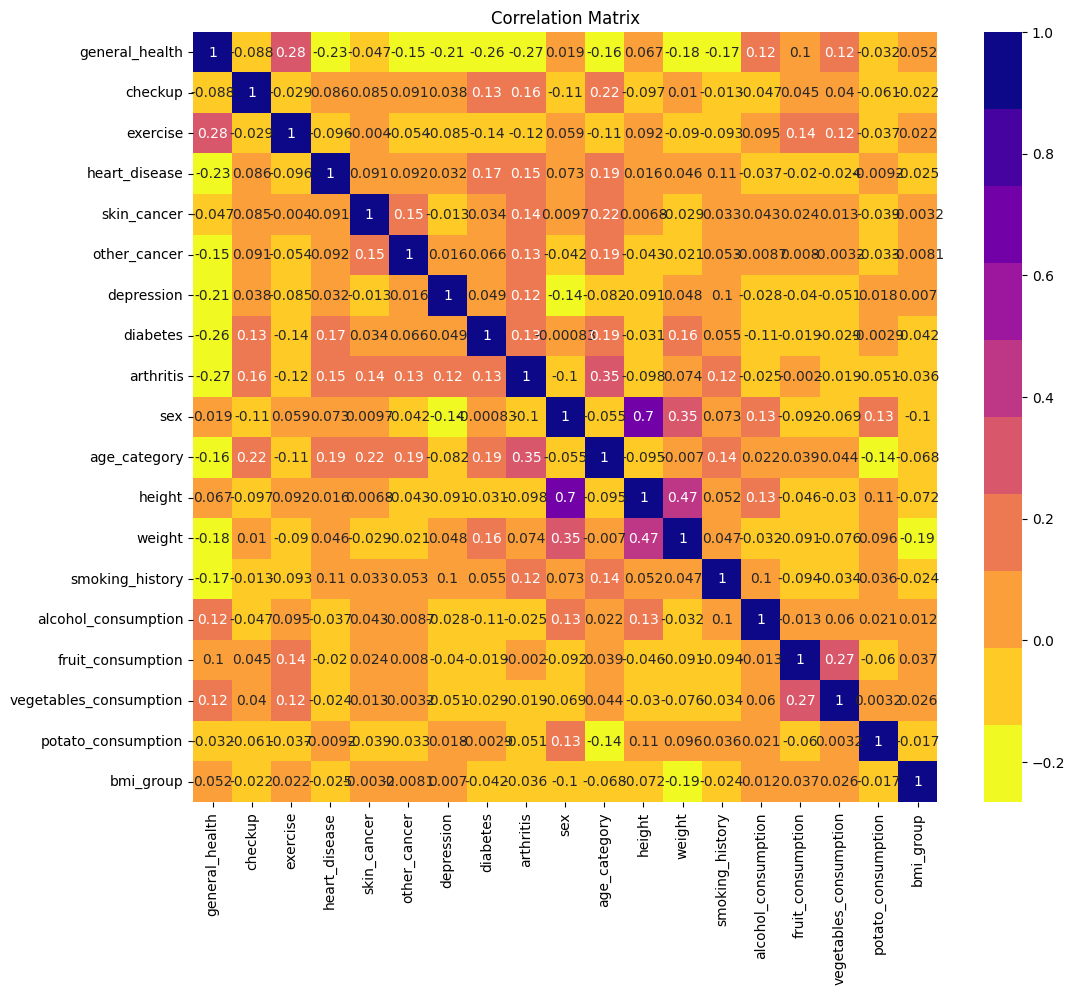

In [ ]:
# prompt: plot a correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap=colors)
plt.title('Correlation Matrix')
plt.show()


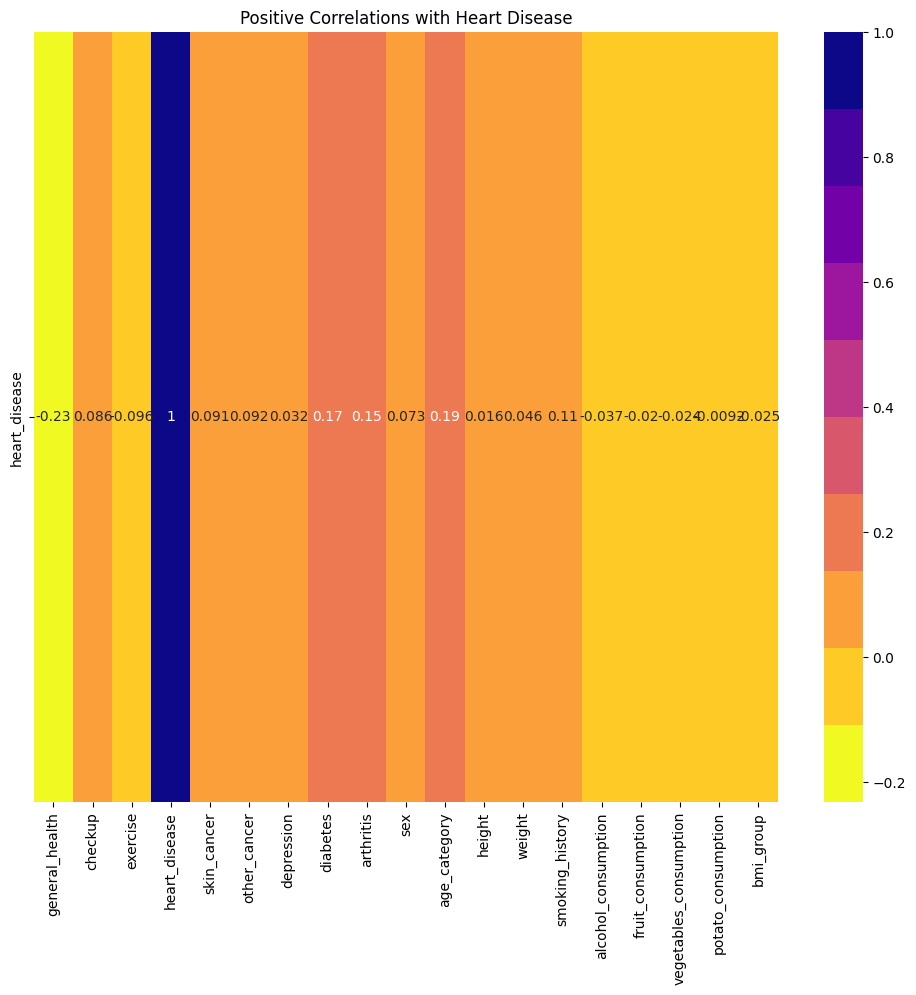

In [ ]:
# prompt: plot positive correlations with heart_disease column

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr()[df.corr()['heart_disease'] > 0.3], annot=True, cmap=colors)
plt.title('Positive Correlations with Heart Disease')
plt.show()


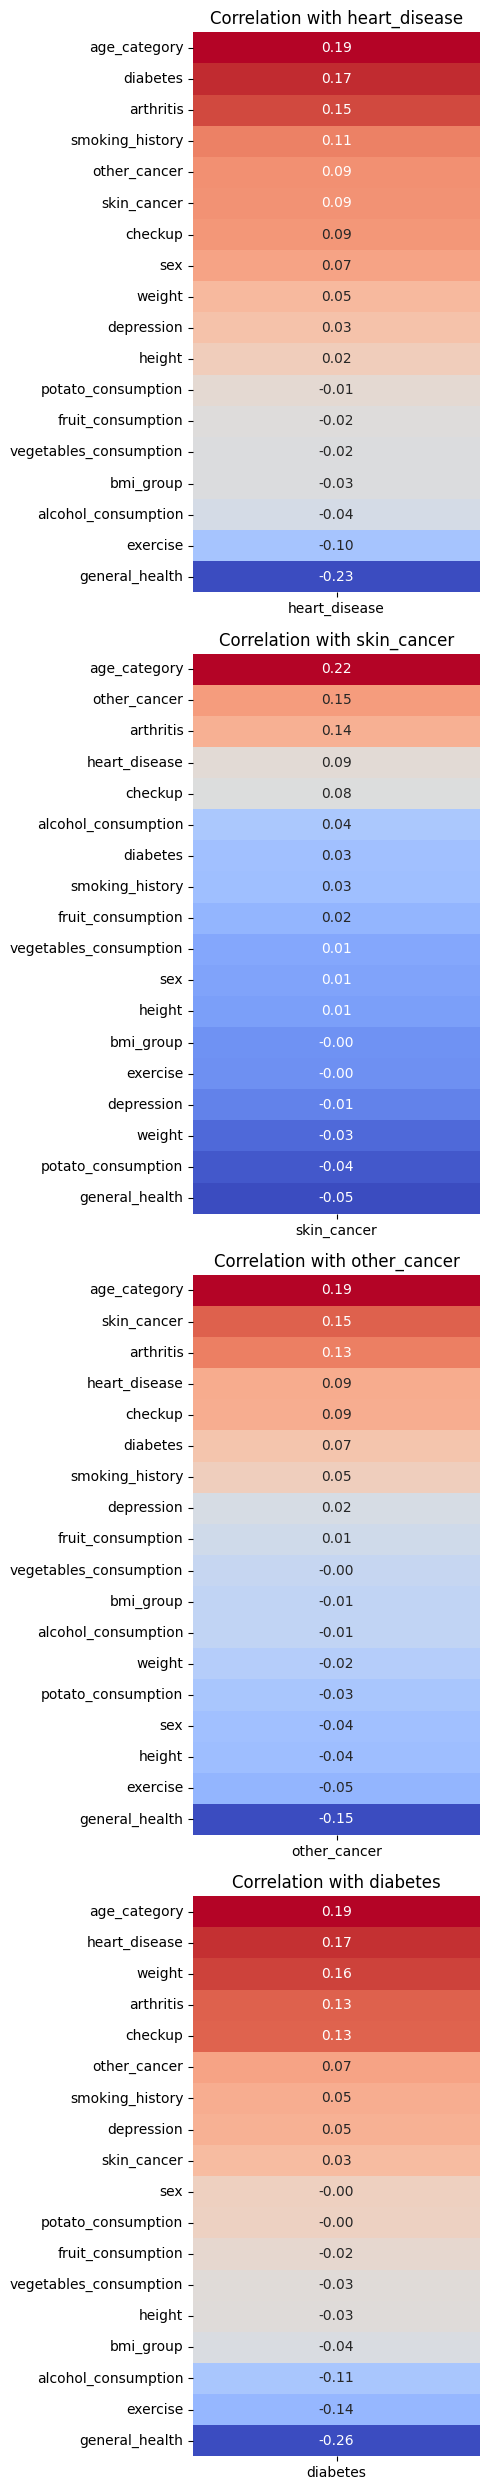

In [ ]:
 #Compute the correlation of each feature with the disease variables
disease_variables = ['heart_disease', 'skin_cancer', 'other_cancer', 'diabetes']

# Compute the correlation matrix
corr = df.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

### prediction

In [ ]:
df.head()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption,bmi_group
0,0,3,0,0,0,0,0,0,1,0,3,150.0,32.66,1,0,30,16,12,0
1,3,4,0,1,0,0,0,1,0,0,3,165.0,77.11,0,0,30,0,4,1
2,3,4,1,0,0,0,0,1,0,0,3,163.0,88.45,0,4,12,3,16,2
3,0,4,1,1,0,0,0,1,0,1,3,180.0,93.44,0,0,30,30,8,1
4,2,4,0,0,0,0,0,0,0,1,3,191.0,88.45,1,0,8,4,0,3


### check heart disease balance

#### select sample or full data

In [ ]:
df['heart_disease'].value_counts()
# df=df.sample(50000)

0    283803
1     24971
Name: heart_disease, dtype: int64

In [ ]:
X = df.drop("heart_disease", axis = 1)
y = df['heart_disease']

### unbalanced dataset, so resampling using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
y_balanced.value_counts()

0    283803
1    283803
Name: heart_disease, dtype: int64

In [ ]:
# Splitting the data into training and testing sets for diabetes balanced

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
df.describe()

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height,weight,smoking_history,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption,bmi_group
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,2.530288,3.617902,0.775017,0.080871,0.097133,0.096760,0.200467,0.138665,0.327304,0.481320,2.246439,170.615220,83.590399,0.405662,5.097557,29.834290,15.109517,6.297237,1.905993
std,1.031246,0.815188,0.417572,0.272638,0.296139,0.295631,0.400350,0.345597,0.469230,0.499652,0.949529,10.658452,21.344664,0.491021,8.200434,24.877812,14.926912,8.583837,0.834096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,163.000000,68.040000,0.000000,0.000000,12.000000,4.000000,2.000000,1.000000
50%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,170.000000,81.650000,0.000000,1.000000,30.000000,12.000000,4.000000,2.000000
75%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,178.000000,95.250000,1.000000,6.000000,30.000000,20.000000,8.000000,3.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,241.000000,293.020000,1.000000,30.000000,120.000000,128.000000,128.000000,3.000000


In [ ]:
# Feature Scaling
scaler_d = StandardScaler()
X_train= scaler_d.fit_transform(X_train)
X_test= scaler_d.transform(X_test)

# without scaling
# X_train_scaled = X_train
# X_test_scaled = X_test

In [ ]:
# Create the models
# LR
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

prediction_LR = model_LR.predict(X_test)
acc_LR=accuracy_score(prediction_LR,y_test)

#RF
model_RF= RandomForestClassifier()
model_RF.fit(X_train,y_train)

prediction_RF = model_RF.predict(X_test)
acc_RF=accuracy_score(prediction_RF,y_test)

#KNN
model_KNN=KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,y_train)

prediction_KNN = model_KNN.predict(X_test)
acc_KNN=accuracy_score(prediction_KNN,y_test)

#DT
model_DT=DecisionTreeClassifier(max_depth=None)
model_DT.fit(X_train,y_train)

prediction_DT = model_DT.predict(X_test)
acc_DT=accuracy_score(prediction_DT,y_test)

# #SVM
# model_SVC=SVC()
# model_SVC.fit(X_train,y_train)

# prediction_SVC = model_SVC.predict(X_test)
# acc_SVC=accuracy_score(prediction_SVC,y_test)

# XGB
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)

prediction_XGB = model_XGB.predict(X_test)
acc_XGB=accuracy_score(prediction_XGB,y_test)


print("LR:",acc_LR )
print("RF:",acc_RF)
print("KNN:",acc_KNN)
print("DT:",acc_DT)
# print("SVC:",acc_SVC)
print("XGBoost:",acc_XGB)

LR: 0.7995983157449658
RF: 0.9123429819770618
KNN: 0.824016490195733
DT: 0.8699547224326563
XGBoost: 0.8884797660365392


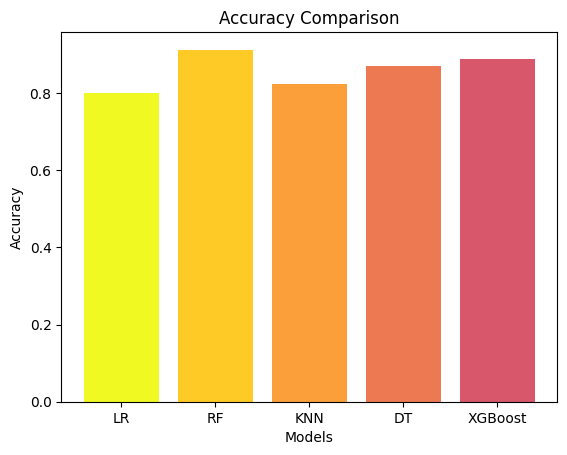

In [ ]:
# prompt: print 6 accuracy bar plot in 6 different colors

plt.bar(['LR', 'RF', 'KNN', 'DT','XGBoost'], [acc_LR, acc_RF, acc_KNN, acc_DT,acc_XGB], color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
# plt.show()

# Save the plot as a high-resolution image
plt.savefig('accuracy.jpg', dpi=1200)


In [ ]:
# Classification reports for different algorithms

model_LR_report = classification_report(y_test, prediction_LR)
model_RF_report = classification_report(y_test, prediction_RF)
model_KNN_report = classification_report(y_test, prediction_KNN)
model_DT_report = classification_report(y_test, prediction_DT)
# model_SVC_report = classification_report(y_test, prediction_SVC)
model_XGB_report = classification_report(y_test, prediction_XGB)



print(model_LR_report)
print(model_RF_report)
print(model_KNN_report)
print(model_DT_report)
# print(model_SVC_report)
print(model_XGB_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     56471
           1       0.80      0.81      0.80     57051

    accuracy                           0.80    113522
   macro avg       0.80      0.80      0.80    113522
weighted avg       0.80      0.80      0.80    113522

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56471
           1       0.90      0.93      0.91     57051

    accuracy                           0.91    113522
   macro avg       0.91      0.91      0.91    113522
weighted avg       0.91      0.91      0.91    113522

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     56471
           1       0.79      0.88      0.83     57051

    accuracy                           0.82    113522
   macro avg       0.83      0.82      0.82    113522
weighted avg       0.83      0.82      0.82    113522

              preci

In [ ]:
# >>> from sklearn import datasets, metrics, model_selection, svm

# plot_roc_curve(model_LR,X_test,y_test)
# plt.plot([0,1],[0,1])

# plot_roc_curve(model_RF,X_test,y_test)
# plt.plot([0,1],[0,1])

# plot_roc_curve(model_KNN,X_test,y_test)
# plt.plot([0,1],[0,1])

# plot_roc_curve(model_DT,X_test,y_test)
# plt.plot([0,1],[0,1])

# plot_roc_curve(model_SVC,X_test,y_test)
# plt.plot([0,1],[0,1])

In [ ]:
# prompt: plot confusion matrix for all algorithms

from sklearn.metrics import confusion_matrix
# Confusion matrix for Logistic Regression
cm_LR = confusion_matrix(y_test, prediction_LR)
print('Confusion matrix for Logistic Regression:\n', cm_LR)

# Confusion matrix for Random Forest
cm_RF = confusion_matrix(y_test, prediction_RF)
print('Confusion matrix for Random Forest:\n', cm_RF)

# Confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, prediction_KNN)
print('Confusion matrix for KNN:\n', cm_KNN)

# Confusion matrix for Decision Tree
cm_DT = confusion_matrix(y_test, prediction_DT)
print('Confusion matrix for Decision Tree:\n', cm_DT)

# # Confusion matrix for SVM
# cm_SVC = confusion_matrix(y_test, prediction_SVC)
# print('Confusion matrix for SVM:\n', cm_SVC)

# Confusion matrix for XGB
cm_XGB = confusion_matrix(y_test, prediction_XGB)
print('Confusion matrix for XGB:\n', cm_XGB)


Confusion matrix for Logistic Regression:
 [[44817 11654]
 [11096 45955]]
Confusion matrix for Random Forest:
 [[50778  5693]
 [ 4258 52793]]
Confusion matrix for KNN:
 [[43550 12921]
 [ 7057 49994]]
Confusion matrix for Decision Tree:
 [[47698  8773]
 [ 5990 51061]]
Confusion matrix for XGB:
 [[50611  5860]
 [ 6800 50251]]


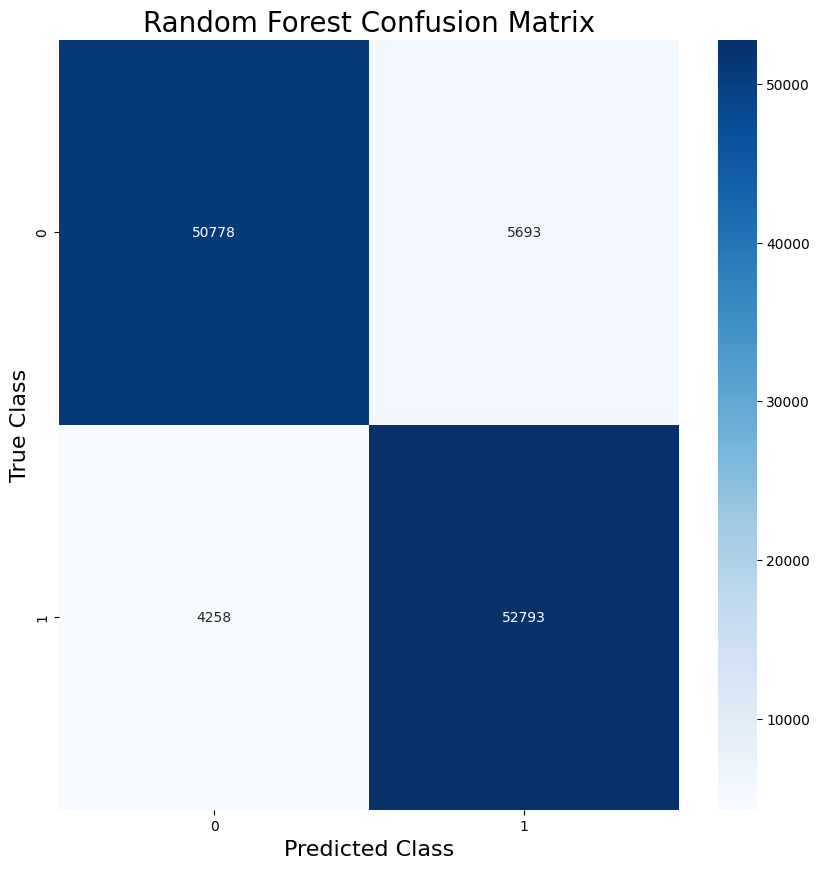

In [ ]:
# prompt: plot confusion matrix of random forest and xgboost algorithm  and save the figure in 300 dpi

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_RF, annot=True, ax=ax, cmap='Blues', fmt='d')
ax.set_title('Random Forest Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('True Class', fontsize=16)
plt.savefig('cm_rf.png', dpi=600)



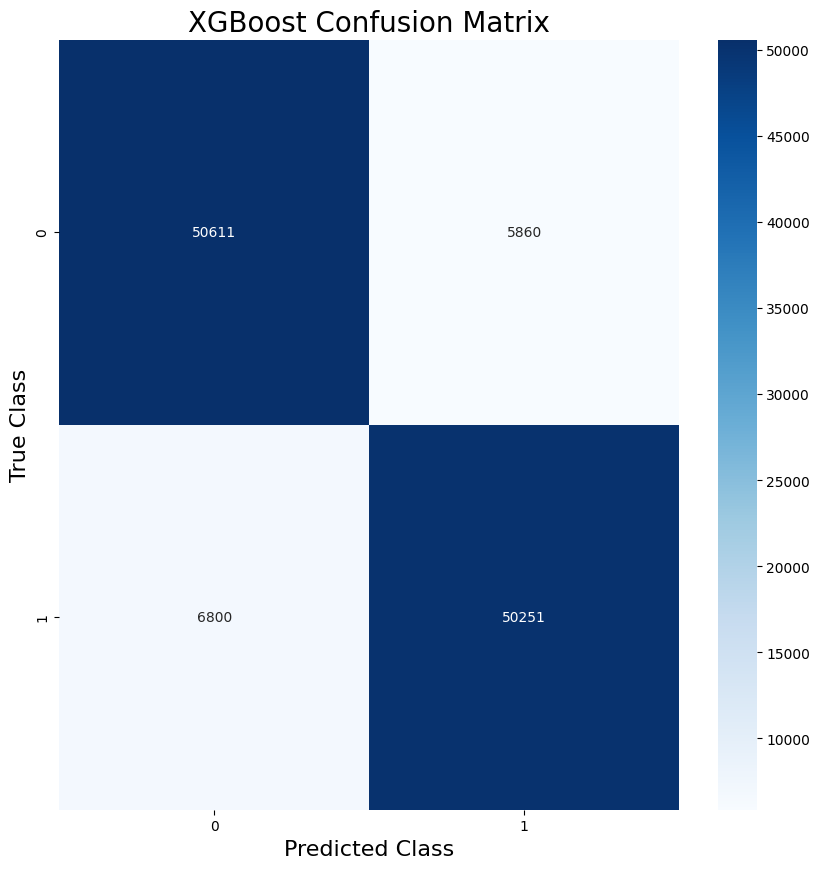

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_XGB, annot=True, ax=ax, cmap='Blues', fmt='d')
ax.set_title('XGBoost Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Class', fontsize=16)
ax.set_ylabel('True Class', fontsize=16)
plt.savefig('cm_xgb.png', dpi=600)

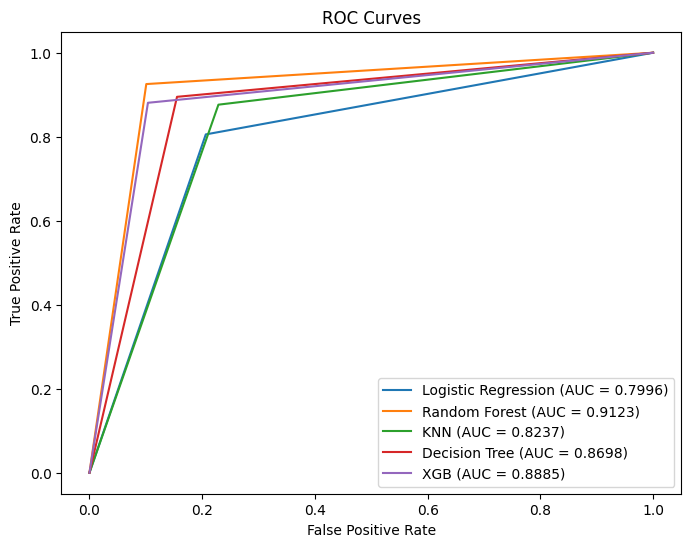

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each model
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, prediction_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prediction_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prediction_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prediction_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

# fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, prediction_SVC)
# roc_auc_SVC = auc(fpr_SVC, tpr_SVC)

fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test, prediction_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label='Logistic Regression (AUC = %0.4f)' % roc_auc_LR)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = %0.4f)' % roc_auc_RF)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = %0.4f)' % roc_auc_KNN)
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = %0.4f)' % roc_auc_DT)
# plt.plot(fpr_SVC, tpr_SVC, label='SVM (AUC = %0.4f)' % roc_auc_SVC)
plt.plot(fpr_XGB, tpr_XGB, label='XGB (AUC = %0.4f)' % roc_auc_XGB)


# Add legend and title
plt.legend(loc='lower right')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Save the plot as a high-resolution image
plt.savefig('roc_auc_curve.jpg', dpi=600)


In [ ]:
# # Calculate ROC and AUC for each model

# LR_fpr, LR_tpr, _ = roc_curve(y_test, prediction_LR)
# LR_auc = auc(LR_fpr, LR_tpr)

# RF_fpr, RF_tpr, _ = roc_curve(y_test, prediction_RF)
# RF_auc = auc(RF_fpr, RF_tpr)

# KNN_fpr, KNN_tpr, _ = roc_curve(y_test, prediction_KNN)
# KNN_auc = auc(KNN_fpr, KNN_tpr)

# DT_fpr, DT_tpr, _ = roc_curve(y_test, prediction_DT)
# DT_auc = auc(DT_fpr, DT_tpr)

# SVC_fpr, SVC_tpr, _ = roc_curve(y_test, prediction_SVC)
# SVC_auc = auc(SVC_fpr, SVC_tpr)

# # Create ROC curve plot using Plotly

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=LR_fpr, y=LR_tpr, mode='lines', name=f'LR (AUC = {LR_auc:.2f})', line=color'red')
# fig.add_trace(go.Scatter(x=RF_fpr, y=RF_tpr, mode='lines', name=f'RF (AUC = {RF_auc:.2f})', line=dict(color=colors[3])))
# fig.add_trace(go.Scatter(x=KNN_fpr, y=KNN_tpr, mode='lines', name=f'KNN (AUC = {KNN_auc:.2f})', line=dict(color=colors[7])))
# fig.add_trace(go.Scatter(x=DT_fpr, y=DT_tpr, mode='lines', name=f'DT (AUC = {DT_auc:.2f})', line=dict(color=colors[5])))
# fig.add_trace(go.Scatter(x=SVC_fpr, y=SVC_tpr, mode='lines', name=f'SVC (AUC = {SVC_auc:.2f})', line=dict(color=colors[6])))




# fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
# fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve for CVD', xaxis=dict(title='False Positive Rate'), yaxis=dict(title='True Positive Rate'), legend=dict(x=0.7, y=0.2), autosize=False, width=900, height=500, plot_bgcolor='white')
# fig.show()

In [ ]:
# prompt: get precision recall f1 score of all algorithms in a dataframe

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Decision Tree","XGBoost"],
    "Accuracy": [acc_LR, acc_RF, acc_KNN, acc_DT, acc_XGB],
    "Precision": [precision_score(y_test, prediction_LR), precision_score(y_test, prediction_RF), precision_score(y_test, prediction_KNN), precision_score(y_test, prediction_DT), precision_score(y_test, prediction_XGB)],
    "Recall": [recall_score(y_test, prediction_LR), recall_score(y_test, prediction_RF), recall_score(y_test, prediction_KNN), recall_score(y_test, prediction_DT), recall_score(y_test, prediction_XGB)],
    "F1 Score": [f1_score(y_test, prediction_LR), f1_score(y_test, prediction_RF), f1_score(y_test, prediction_KNN), f1_score(y_test, prediction_DT), f1_score(y_test, prediction_XGB)]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.799598,0.797705,0.805507,0.801587
1,Random Forest,0.912343,0.902660,0.925365,0.913872
2,KNN,0.824016,0.794628,0.876304,0.833469
3,Decision Tree,0.869955,0.853378,0.895006,0.873696
4,XGBoost,0.888480,0.895564,0.880808,0.888125


In [ ]:
# # prompt: get precision recall f1 score of all algorithms in a dataframe

# df_results = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree','XGBoost'],
#     'Accuracy': [acc_LR, acc_RF, acc_KNN, acc_DT, acc_XGB],
#     'Precision': [precision_LR, precision_RF, precision_KNN, precision_DT,precision_XGB],
#     'Recall': [recall_LR, recall_RF, recall_KNN, recall_DT, recall_XGB],
#     'F1 Score': [f1_score(y_test, prediction_LR), f1_score(y_test, prediction_RF), f1_score(y_test, prediction_KNN), f1_score(y_test, prediction_DT), f1_score(y_test, prediction_XGB)]
# })
# df_results


In [ ]:
# prompt: calculate true positive, true negative, false positive, false negative, true positive rate, false positive rate of all algorithm and print in a dataframe

import pandas as pd
from sklearn.metrics import confusion_matrix

# Create a confusion matrix for each model
cm_LR = confusion_matrix(y_test, prediction_LR)
cm_RF = confusion_matrix(y_test, prediction_RF)
cm_KNN = confusion_matrix(y_test, prediction_KNN)
cm_DT = confusion_matrix(y_test, prediction_DT)
# cm_SVC = confusion_matrix(y_test, prediction_SVC)
cm_XGB = confusion_matrix(y_test, prediction_XGB)

# Calculate the true positives, true negatives, false positives, and false negatives for each model
tp_LR = cm_LR[0][0]
tn_LR = cm_LR[1][1]
fp_LR = cm_LR[0][1]
fn_LR = cm_LR[1][0]

tp_RF = cm_RF[0][0]
tn_RF = cm_RF[1][1]
fp_RF = cm_RF[0][1]
fn_RF = cm_RF[1][0]

tp_KNN = cm_KNN[0][0]
tn_KNN = cm_KNN[1][1]
fp_KNN = cm_KNN[0][1]
fn_KNN = cm_KNN[1][0]

tp_DT = cm_DT[0][0]
tn_DT = cm_DT[1][1]
fp_DT = cm_DT[0][1]
fn_DT = cm_DT[1][0]

# tp_SVC = cm_SVC[0][0]
# tn_SVC = cm_SVC[1][1]
# fp_SVC = cm_SVC[0][1]
# fn_SVC = cm_SVC[1][0]

tp_XGB = cm_XGB[0][0]
tn_XGB = cm_XGB[1][1]
fp_XGB = cm_XGB[0][1]
fn_XGB = cm_XGB[1][0]

# Calculate the true positive rate, false positive rate, true negative rate, and false negative rate for each model
tpr_LR = tp_LR / (tp_LR + fn_LR)
fpr_LR = fp_LR / (fp_LR + tn_LR)
tnr_LR = tn_LR / (tn_LR + fp_LR)
fnr_LR = fn_LR / (fn_LR + tp_LR)

tpr_RF = tp_RF / (tp_RF + fn_RF)
fpr_RF = fp_RF / (fp_RF + tn_RF)
tnr_RF = tn_RF / (tn_RF + fp_RF)
fnr_RF = fn_RF / (fn_RF + tp_RF)

tpr_KNN = tp_KNN / (tp_KNN + fn_KNN)
fpr_KNN = fp_KNN / (fp_KNN + tn_KNN)
tnr_KNN = tn_KNN / (tn_KNN + fp_KNN)
fnr_KNN = fn_KNN / (fn_KNN + tp_KNN)

tpr_DT = tp_DT / (tp_DT + fn_DT)
fpr_DT = fp_DT / (fp_DT + tn_DT)
tnr_DT = tn_DT / (tn_DT + fp_DT)
fnr_DT = fn_DT / (fn_DT + tp_DT)

# tpr_SVC = tp_SVC / (tp_SVC + fn_SVC)
# fpr_SVC = fp_SVC / (fp_SVC + tn_SVC)
# tnr_SVC = tn_SVC / (tn_SVC + fp_SVC)
# fnr_SVC = fn_SVC / (fn_SVC + tp_SVC)

tpr_XGB = tp_XGB / (tp_XGB + fn_XGB)
fpr_XGB = fp_XGB / (fp_XGB + tn_XGB)
tnr_XGB = tn_XGB / (tn_XGB + fp_XGB)
fnr_XGB = fn_XGB / (fn_XGB + tp_XGB)

# Create a dataframe to store the results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Decision Tree","XGBoost"],
    "True Positive": [tp_LR, tp_RF, tp_KNN, tp_DT, tp_XGB],
    "True Negative": [tn_LR, tn_RF, tn_KNN, tn_DT, tn_XGB],
    "False Positive": [fp_LR, fp_RF, fp_KNN, fp_DT, fp_XGB],
    "False Negative": [fn_LR, fn_RF, fn_KNN, fn_DT, fn_XGB],
    "True Positive Rate": [tpr_LR, tpr_RF, tpr_KNN, tpr_DT, tpr_XGB],
    "False Positive Rate": [fpr_LR, fpr_RF, fpr_KNN, fpr_DT, fpr_XGB],
    "True Negative Rate": [tnr_LR, tnr_RF, tnr_KNN, tnr_DT, tnr_XGB],
    "False Negative Rate": [fnr_LR, fnr_RF, fnr_KNN, fnr_DT, fnr_XGB]
})

# Print the dataframe
display(results)


,Model,True Positive,True Negative,False Positive,False Negative,True Positive Rate,False Positive Rate,True Negative Rate,False Negative Rate
0,Logistic Regression,44817,45955,11654,11096,0.801549,0.202295,0.797705,0.198451
1,Random Forest,50778,52793,5693,4258,0.922632,0.097340,0.902660,0.077368
2,KNN,43550,49994,12921,7057,0.860553,0.205372,0.794628,0.139447
3,Decision Tree,47698,51061,8773,5990,0.888429,0.146622,0.853378,0.111571
4,XGBoost,50611,50251,5860,6800,0.881556,0.104436,0.895564,0.118444


In [ ]:

# print('\ntrain acc:',rf_d.score(X_train_scaled,y_train))
# print('\ntest acc:',rf_d.score(X_test_scaled,y_test))

In [ ]:

# print('\ntrain acc:',lr_d.score(X_train_scaled,y_train))
# print('\ntest acc:',lr_d.score(X_test_scaled,y_test))